In [3]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import time
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [22]:
#df_train = pd.read_csv('train_splitted.csv')
df_train = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid_splitted.csv')

X_train = df_train.drop(columns=['ID_code', 'target'])
X_valid = df_valid.drop(columns=['ID_code', 'target'])

y_train = df_train['target']
y_valid = df_valid['target']

In [23]:
N_1_t = len(X_train[y_train==1]) #/len(X_valid)
N_0_t = len(X_train[y_train==0]) #/len(X_valid)
print(N_1_t, N_0_t)

20098 179902


In [24]:
P_1 = N_1_t/len(X_train)
P_0 = N_0_t/len(X_train)

print(P_1, P_0)

0.10049 0.89951


## Que particularidad tiene el dataset?

Sería un buen modelo uno que predice con un Accuracy de 0.9?

# Create a train model

In [25]:
clf = GaussianNB()
%time clf.fit(X_train.values, y_train.values)

CPU times: user 4.12 s, sys: 523 ms, total: 4.65 s
Wall time: 2.33 s


GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
clf.classes_

array([0, 1])

In [27]:
clf.class_prior_

array([0.89951, 0.10049])

# Train dataset (Solo entrenado con Train)

In [28]:
print(clf.score(X_train, y_train))
predicted_proba_tr = clf.predict_proba(X_train)
roc_auc_score(y_train, predicted_proba_tr[:,1]/(1-predicted_proba_tr[:,1]))

0.9217


0.8899667114457852

In [29]:
min(predicted_proba_tr[:,1]/(1-predicted_proba_tr[:,1]))

4.096068584337653e-05

In [30]:
max(predicted_proba_tr[:,1])

0.9995802002555082

In [35]:
# pickle.dump(clf, open('trained_models/GNB_train_only.pk', 'wb'))
pickle.dump(clf, open('trained_models/GNB_all_data.pk', 'wb'))

In [41]:
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [42]:
clf.set_params()

GaussianNB(priors=None, var_smoothing=1e-09)

# Validation dataset

In [31]:
predicted = clf.predict(X_valid)

In [32]:
clf.score(X_valid, y_valid)

0.9216

In [33]:
predicted_proba = clf.predict_proba(X_valid)

In [34]:
roc_auc_score(y_valid, predicted_proba[:,1])

0.8937572270399132

In [132]:
fpr, tpr, thres = roc_curve(y_valid, predicted_proba[:,1])

In [133]:
print(thres)

[1.99928535e+00 9.99285350e-01 9.68381076e-01 ... 6.92799419e-04
 6.92674617e-04 6.28074097e-05]


In [134]:
thres[1]

0.9992853501246479

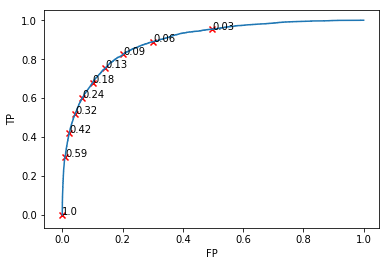

In [135]:
plt.plot(fpr, tpr)

for i, th in enumerate(thres[1:]):
    if i%500==0:
        plt.scatter(fpr[i], tpr[i], marker='x', c='r')
        plt.text(fpr[i], tpr[i], np.round(th,2))
plt.xlabel('FP')
plt.ylabel('TP')
plt.show()

Pongo umbral en 0; siempre estimo un 1, es decir que voy a tener 100% TP

Ejemplo:
- pongo umbral en 0.5
- No tengo casi ningun FP y tengo en el orden de 0.4 TP.
- Como esta muy desbalanceado y hay muchos mas negativos, el accuracy da muy alto en este caso

In [136]:
idx_50 = np.where((thres > 0.4999) & (thres<0.5001))[0][0]
print(tpr[idx_50], fpr[idx_50])

0.36204343534057254 0.01591187270501836


In [137]:
N_1 = len(X_valid[y_valid==1]) #/len(X_valid)
N_0 = len(X_valid[y_valid==0]) #/len(X_valid)
print(N_1, N_0)

4052 35948


In [138]:
Correct_predicts = (1-fpr[idx_50])*N_0 + tpr[idx_50]*N_1
print(Correct_predicts)

36843.0


In [139]:
Correct_predicts/len(X_valid)

0.921075

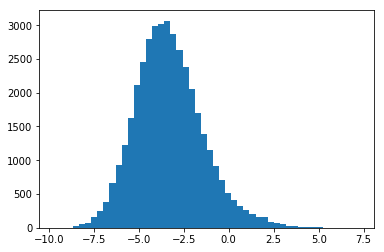

In [140]:
log_odds = np.log(predicted_proba[:,1]/(1-predicted_proba[:,1]))
_ = plt.hist(log_odds, 50)

In [141]:
print(clf.sigma_.shape, clf.theta_.shape)
params = np.prod(clf.sigma_.shape), np.prod(clf.theta_.shape)
print(params)
sum(params)

(2, 200) (2, 200)
(400, 400)


800

# Busqueda de hiperparamtros

In [169]:
variances = np.logspace(-11, -9)

In [170]:
auc_rocs=[]
for v in variances:
    clf = GaussianNB(var_smoothing=v)
    clf.fit(X_train.values, y_train.values)
    predicted_proba = clf.predict_proba(X_valid)
    sc = roc_auc_score(y_valid, predicted_proba[:,1])
    auc_rocs.append(sc)
    print(sc)

0.8928055041356302
0.8928055041356303
0.8928055247448952
0.8928055522239152
0.8928055247448953
0.8928055384844052
0.8928055384844052
0.8928055110053853
0.8928055110053852
0.8928055522239152
0.8928055178751403
0.8928054835263654
0.8928054629171004
0.8928055178751403
0.8928055041356304
0.8928055384844051
0.8928054285683253
0.8928054972658754
0.8928054285683253
0.8928054079590604
0.8928053667405305
0.8928053942195504
0.8928054079590606
0.8928054216985706
0.8928054285683256
0.8928053255220005
0.8928053255220005
0.8928052911732255
0.8928052636942055
0.8928052843034705
0.8928053392615105
0.8928053255220005
0.8928054285683253
0.8928053530010205
0.8928054216985704
0.8928054560473453
0.8928054903961203
0.8928054560473453
0.8928054903961204
0.8928052636942055
0.8928052843034706
0.8928051125595959
0.8928051400386159
0.8928052430849407
0.8928051743873908
0.8928050919503309
0.892805050731801
0.8928049202064561
0.8928048789879263
0.8928045767187068


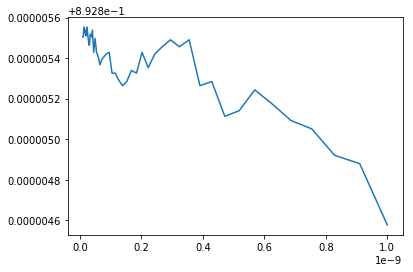

In [171]:
plt.plot(variances, auc_rocs)

In [175]:
means = df_train.mean()
stds = df_train.std()

In [176]:
X_train_norm = (X_train-means)/stds
X_valid_norm = (X_valid-means)/stds

In [179]:
variances = np.logspace(-11, -1)

In [180]:
auc_rocs=[]
for v in variances:
    clf = GaussianNB(var_smoothing=v)
    clf.fit(X_train_norm, y_train)
    predicted_proba = clf.predict_proba(X_valid_norm)
    sc = roc_auc_score(y_valid, predicted_proba[:,1])
    auc_rocs.append(sc)
    print(sc)

0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055590936703
0.8928055453541601
0.8928055316146501
0.8928055316146501
0.8928055384844052
0.8928055384844052
0.8928055659634252
0.8928055590936701
0.8928055659634251
0.8928056003122001
0.8928056346609751
0.892805662139995
0.8928056140517102
0.8928055659634251
0.8928054903961203
0.8928052087361658
0.8928047965508664
0.8928042401007124
0.8928035256461934
0.8928026463175549
0.8928002144242886
0.8927977413124923
0.89279295996302
0.8927861245568055
0.8927747345030332
0.892756220513337
0.8927240975390072
0.8926769298012505
0.8925950698007982
0.8924557374301054
0.8922225848155236


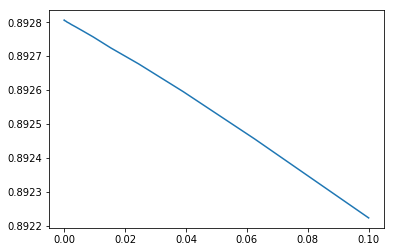

In [181]:
plt.plot(variances, auc_rocs)

# Modelo entrenado con toda la data

In [154]:
df = pd.read_csv('train.csv')

In [155]:
X_train = df.drop(columns=['ID_code', 'target'])
y_train = df['target']

In [156]:
X_train.shape

(200000, 200)

In [157]:
clf = GaussianNB()
%time clf.fit(X_train.values, y_train.values)

CPU times: user 3.28 s, sys: 1 s, total: 4.28 s
Wall time: 5.4 s


GaussianNB(priors=None, var_smoothing=1e-09)

In [158]:
pickle.dump(clf, open('naive_bayes_all_data.pk', 'wb'))

In [21]:
X_test = pd.read_csv('test.csv').set_index('ID_code')

In [20]:
predicted_proba_test = clf.predict_proba(X_test)

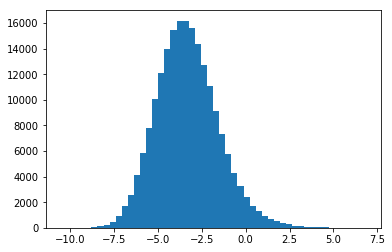

In [30]:
predicted_test = predicted_proba_test[:,1]
log_odds = np.log(predicted_test/(1-predicted_test))
_ = plt.hist(log_odds, 50)

In [31]:
df_test['target'] = predicted_test

In [32]:
filename = 'submission_naive_bayes_{}.csv'.format(int(time.time()))
message = 'naive bayes third submission'
df_test[['target']].to_csv(filename)

In [33]:
! kaggle competitions submit -c santander-customer-transaction-prediction -f {filename} -m '{message}'

100%|███████████████████████████████████████| 6.07M/6.07M [00:22<00:00, 278kB/s]
Successfully submitted to Santander Customer Transaction Prediction

In [35]:
filename

'submission_naive_bayes_1553708250.csv'